## Importing Libraries and setting-up environment

In [1]:
import pandas as pd #Data manipulation and analysis
import numpy as np #Numerical computing
import matplotlib.pyplot as plt #Data Visualzation
import seaborn as sns #Data Visualzation
import time #Various time-related functions

In [2]:
#Settings for appropriate display  

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#Ignoring all warning ⚠ messages thrown

import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [4]:
import pandas_datareader as pdr #Remote data access for pandas
from datetime import date

df = pdr.DataReader('TSLA', data_source='yahoo', start='2010-06-28', end = "2019-12-31")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500,3.222


## Correcting the Dataset

In [5]:
df = df["Close"]
df = pd.DataFrame(df)
df.head()

,Close
Date,
2010-06-29,4.778
2010-06-30,4.766
2010-07-01,4.392
2010-07-02,3.840
2010-07-06,3.222


## Visualizing the Data

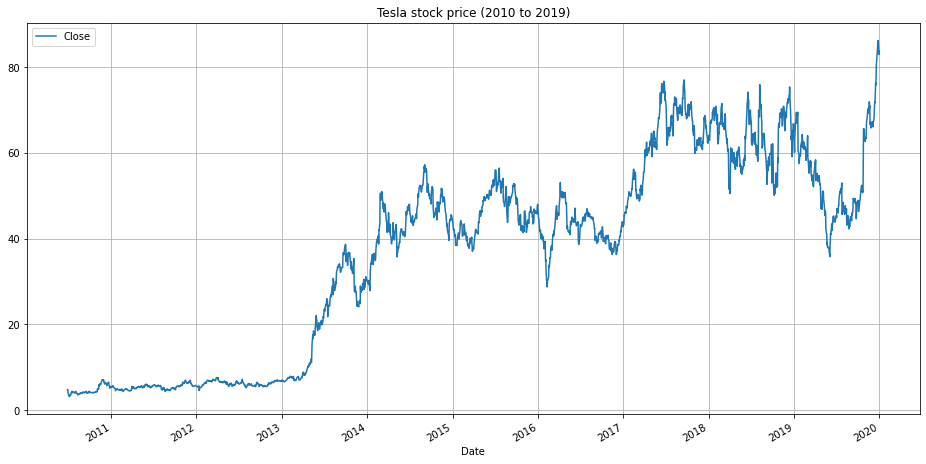

In [6]:
df.plot(figsize=(16,8), title = "Tesla stock price (2010 to 2019)", grid = True)

## Model Building

In [7]:
#Create the train and test data set

train_data = df[:1640] #From 2010 to 2017
test_data = df[1640:] #From 2018 to 2019

In [8]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR

train_ar = train_data['Close']
test_ar = test_data['Close']

# train autoregression
model = AR(train_ar)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

# walk forward over time steps in test
history = train_ar[len(train_ar)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test_ar)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test_ar[t]
    predictions.append(yhat)
    history.append(obs)

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

print('Mean Square Error (MSE): '+str(mean_squared_error(test_data['Close'], predictions)))
print('Mean Absolute Error(MAE): '+str(mean_absolute_error(test_data['Close'], predictions)))
print('Root Mean Square Error (RMSE): '+str(math.sqrt(mean_squared_error(test_data['Close'], predictions))))

Mean Square Error (MSE): 3.3953142732565147
Mean Absolute Error(MAE): 1.2922620670641993
Root Mean Square Error (RMSE): 1.8426378573275093


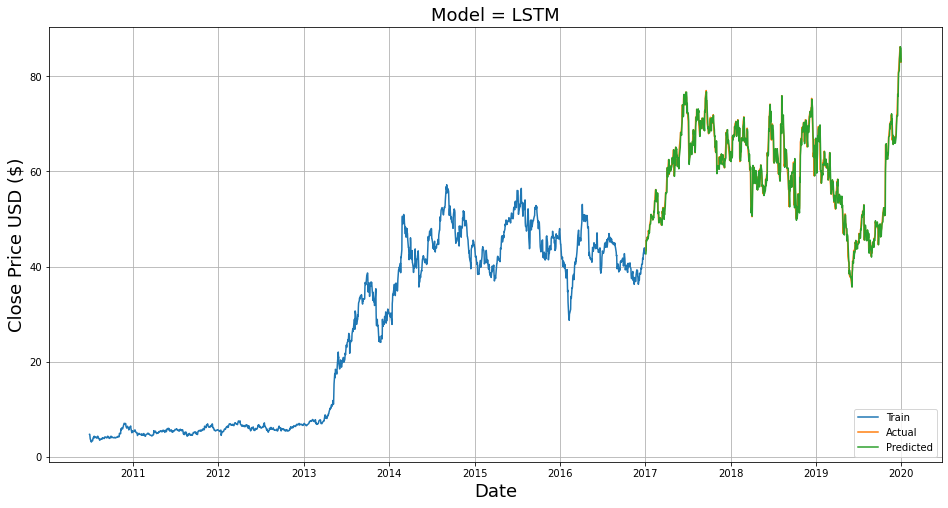

In [19]:
#Visualize the entire data

plt.figure(figsize=(16,8))
plt.title('Model = LSTM', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train_data['Close'])
plt.plot(test_data[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predicted'], loc='lower right')
plt.grid()
plt.show()

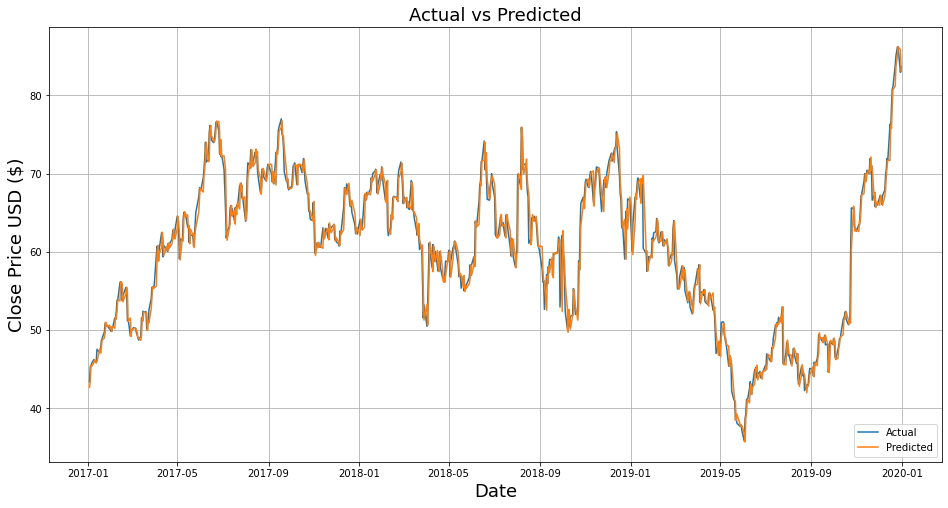

In [21]:
#Visualize the test data

plt.figure(figsize=(16,8))
plt.title('Actual vs Predicted', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(test_data[['Close', 'Predictions']])
plt.legend(['Actual', 'Predicted'], loc='lower right')
plt.grid()
plt.show()

Lag: 24


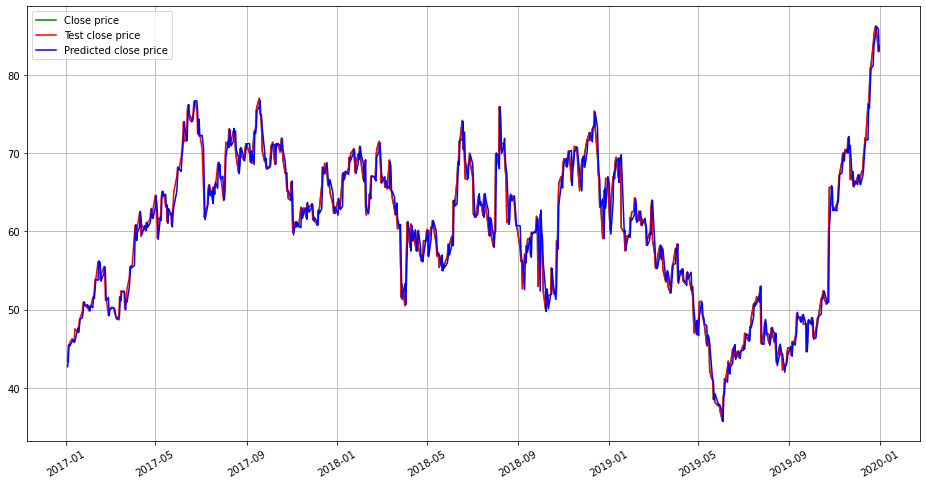

In [10]:
#Visualize entire data

plt.figure(figsize=(16,8))
print('Lag: %s' % model_fit.k_ar)
plt.plot(df.index[-600:], df['Close'].tail(600), color='green', label='Close price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Test close price')
plt.plot(test_data.index, predictions, color='blue', label='Predicted close price')
plt.xticks(rotation=30)
plt.grid(True)
plt.legend()

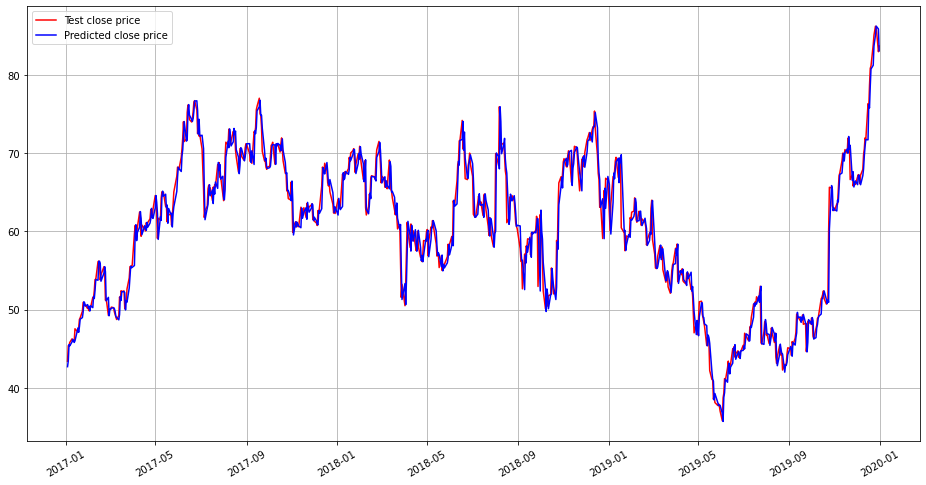

In [11]:
#Visualize the test data

plt.figure(figsize=(16,8))
#print('Lag: %s' % model_fit.k_ar)
#plt.plot(df.index[-600:], df['Close'].tail(600), color='green', label='Close price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Test close price')
plt.plot(test_data.index, predictions, color='blue', label='Predicted close price')
plt.xticks(rotation=30)
plt.grid(True)
plt.legend()

Made by: Hari N. Khatavkar

Credit: https://www.kaggle.com/bogdanbaraban/ar-arima-lstm